In [557]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [558]:
# Reading the data and checking it
health = pd.read_csv('health_data.csv')
health

,Date,A1C (mmol/L),Active Calories (kcal),Blood Glucose (mmol/L),Blood Oxygen (%),Blood Pressure (mmHg),Body Fat (%),Body Mass Index,Body Temperature (degC),Caffeine (mg),...,Walking + Running (km),Walking Asymmetry (%),Walking Heart Rate (bpm),Walking Speed (km/hr),Water (mL),Weight (kg),Wheelchair Distance (km),Workout Type,DURATION,Zinc (mg)
0,2019. 02. 11.,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,NaN,NaN,-
1,2019. 02. 12.,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,NaN,NaN,-
2,2019. 02. 13.,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,NaN,NaN,-
3,2019. 02. 14.,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,NaN,NaN,-
4,2019. 02. 15.,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,NaN,NaN,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,2023. 11. 10.,-,-,-,-,-,-,-,-,-,...,"14,1",-,-,-,-,-,-,NaN,NaN,-
1734,2023. 11. 11.,-,-,-,-,-,-,-,-,-,...,"13,15",-,-,-,-,-,-,NaN,NaN,-
1735,2023. 11. 12.,-,-,-,-,-,-,-,-,-,...,"12,79",-,-,-,-,-,-,NaN,NaN,-
1736,2023. 11. 13.,-,-,-,-,-,-,-,-,-,...,"8,93",-,-,-,-,-,-,NaN,NaN,-


In [559]:
# Taking the columns that contain enough data and printing the head
walked_ran_lot = health[['Date', 'Walking + Running (km)']]
walked_ran_lot.head(20)

,Date,Walking + Running (km)
0,2019. 02. 11.,-
1,2019. 02. 12.,-
2,2019. 02. 13.,-
3,2019. 02. 14.,-
4,2019. 02. 15.,-
5,2019. 02. 16.,-
6,2019. 02. 17.,-
7,2019. 02. 18.,-
8,2019. 02. 19.,-
9,2019. 02. 20.,-


In [560]:
# Dropping the first 10 rows, as they contain no data
walked_ran = walked_ran_lot.drop(walked_ran_lot.index[:10])

# Creating a boolean mask for rows that do not contain '-'
mask = walked_ran_lot['Walking + Running (km)'] != '-'

# Applying the mask to the DataFrame to filter out unwanted rows
walked_ran = walked_ran_lot[mask]

In [561]:
# Replacing the commas with dots
walked_ran['Walking + Running (km)'] = walked_ran['Walking + Running (km)'].str.replace(',', '.')

# Converting the 'Walking + Running (km)' column to floats
walked_ran['Walking + Running (km)'] = walked_ran['Walking + Running (km)'].astype(float)

C:\Users\daraz\AppData\Local\Temp\ipykernel_12924\150019759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walked_ran['Walking + Running (km)'] = walked_ran['Walking + Running (km)'].str.replace(',', '.')
C:\Users\daraz\AppData\Local\Temp\ipykernel_12924\150019759.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walked_ran['Walking + Running (km)'] = walked_ran['Walking + Running (km)'].astype(float)


In [562]:
# Dropping the duplicates if there are any
walked_ran = walked_ran.drop_duplicates()

In [563]:
# Turning the 'Date' column into a datetime object and sorting the DataFrame by it
walked_ran['Date'] = pd.to_datetime(walked_ran['Date'])
walked_ran_sorted = walked_ran.sort_values('Date', inplace=True)

In [564]:
# Creating the axes for plotting the data
x_axis = walked_ran['Date']
y_axis = walked_ran['Walking + Running (km)']

In [565]:
# Create a list of colors, one for each month
colors = ['b', 'c', '#006400', 'g', 'lime', 'y', 'orange', 'r', '#D2691E', '#A52A2A', '#8B4513', '#00008B']

# Map each month to a color
month_to_color = {month: color for month, color in zip(range(1, 13), colors)}

# Assign a color to each bar based on the month
bar_colors = [month_to_color[dt.month] for dt in x_axis]

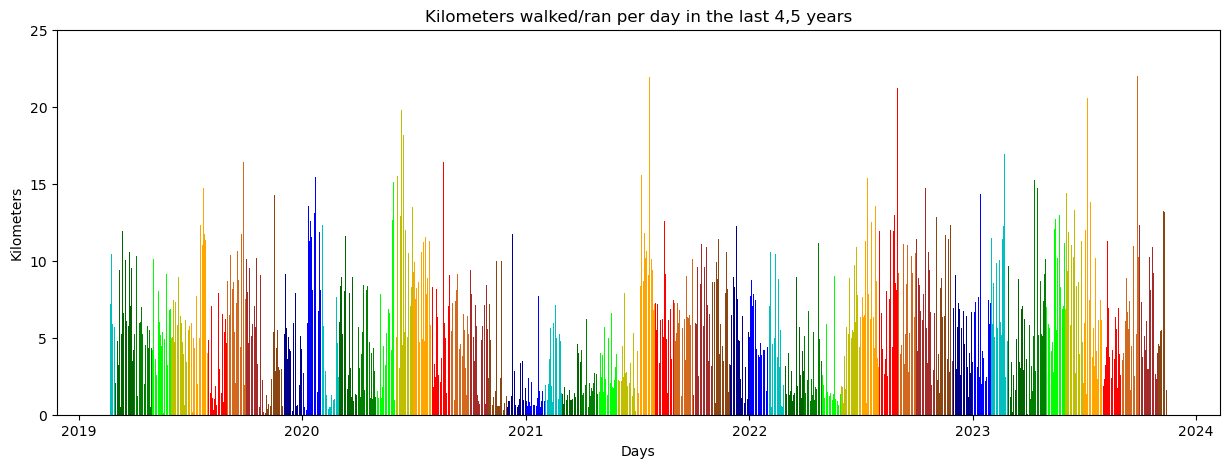

In [566]:
# Plotting the data on a line chart
plt.figure(figsize=(15, 5))  # Setting the figure size to make the plot wider
plt.bar(x_axis, y_axis, color = bar_colors)
plt.title('Kilometers walked/ran per day in the last 4,5 years')
plt.xlabel('Days')
plt.ylabel('Kilometers')
plt.ylim(0, 25)  # Setting the limits for the y-axis
plt.show()


In [567]:
walked_ran.set_index('Date', inplace=True)

# Group by month and aggregate the kilometers by summing them up
monthly_data = walked_ran.groupby(pd.Grouper(freq='M'))['Walking + Running (km)'].sum().reset_index()


In [568]:
# Getting the data for each month
january  = monthly_data.iloc[[11, 23, 35, 47]]
february = monthly_data.iloc[[0, 12, 24, 36, 48]]
march = monthly_data.iloc[[1, 13, 25, 37, 49]]
april = monthly_data.iloc[[2, 14, 26, 38, 50]]
may = monthly_data.iloc[[3, 15, 27, 39, 51]]
june = monthly_data.iloc[[4, 16, 28, 40, 52]]
july = monthly_data.iloc[[5, 17, 29, 41, 53]]
august = monthly_data.iloc[[6, 18, 30, 42, 54]]
september = monthly_data.iloc[[7, 19, 31, 43, 55]]
october = monthly_data.iloc[[8, 20, 32, 44, 56]]
november = monthly_data.iloc[[9, 21, 33, 45, 57]]
december = monthly_data.iloc[[10, 22, 34, 46]]
january

,Date,Walking + Running (km)
11,2020-01-31,240.71
23,2021-01-31,47.71
35,2022-01-31,140.17
47,2023-01-31,183.92


In [569]:
# Getting the average kilometers walked/ran per month
january_average = january['Walking + Running (km)'].mean()
february_average = february['Walking + Running (km)'].mean()
march_average = march['Walking + Running (km)'].mean()
april_average = april['Walking + Running (km)'].mean()
may_average = may['Walking + Running (km)'].mean()
june_average = june['Walking + Running (km)'].mean()
july_average = july['Walking + Running (km)'].mean()
august_average = august['Walking + Running (km)'].mean()
september_average = september['Walking + Running (km)'].mean()
october_average = october['Walking + Running (km)'].mean()
november_average = november['Walking + Running (km)'].mean()
december_average = december['Walking + Running (km)'].mean()

In [570]:
# Creating the list of the average values
year_average_values = [
    january_average, february_average, march_average, april_average, may_average, 
    june_average, july_average, august_average, september_average, 
    october_average, november_average, december_average
]

# Creating corresponding month names
months = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Creating a DataFrame from the lists
year_average_df = pd.DataFrame({
    'Month': months,
    'Kilometers': year_average_values
})

# Printing the DataFrame
year_average_df

,Month,Kilometers
0,January,153.1275
1,February,112.0040
2,March,127.0280
3,April,119.4760
4,May,143.0640
5,June,183.4820
6,July,230.4560
7,August,185.4200
8,September,191.9060
9,October,188.9840


In [571]:
# Creating the axes for plotting the data
x_axis = year_average_df['Month']
y_axis = year_average_df['Kilometers']

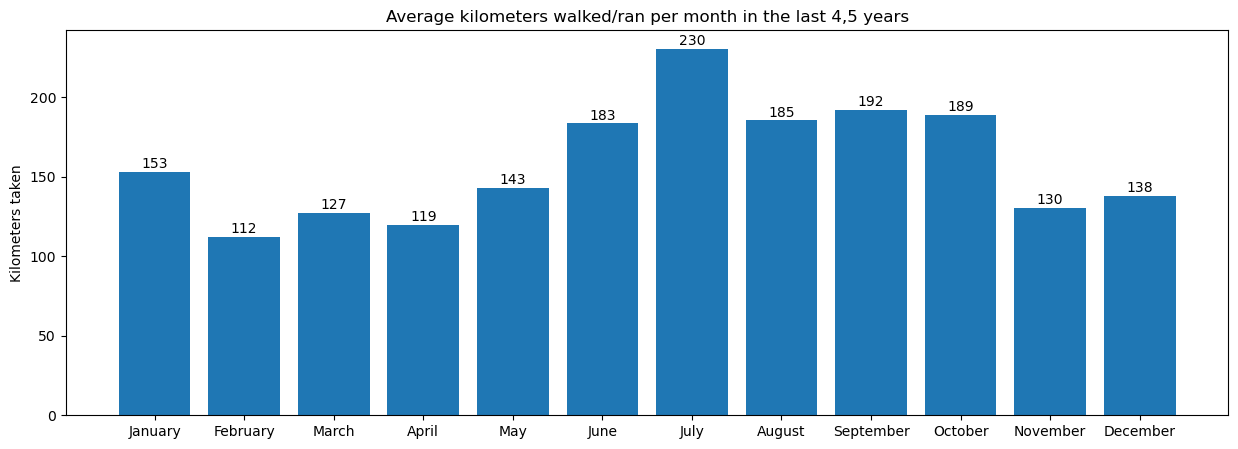

In [572]:
# Creating the bar chart
# Setting the figure size to make the plot wider
plt.figure(figsize=(15, 5)) 

# Creating the bars and saving it in a variable
bars = plt.bar(year_average_df['Month'], year_average_df['Kilometers'])

# Adding title and label
plt.title('Average kilometers walked/ran per month in the last 4,5 years')
plt.ylabel('Kilometers taken')

# Adding the values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval), ha='center', va='bottom')

# Displaying the plot
plt.show()

# Investigating the covid lockdowns
## In Hungary, covid lockdowns in high schools started on the 16th of March, 2020. The first round lasted until the 4th of May.

In [581]:
# Taking the dates on which there were restrictions in Hungary
in_covid_1 = walked_ran.loc['2020-03-16':'2020-05-04']
in_covid_2 = walked_ran.loc['2020-11-11':'2021-04-19']
in_covid = pd.concat([in_covid_1, in_covid_2])
in_covid.mean()

Walking + Running (km)    2.327143
dtype: float64

In [580]:
# Taking the same timeframes when there were no restrictions
no_covid_1 = walked_ran.loc['2019-03-16':'2019-05-04']
no_covid_2 = walked_ran.loc['2019-11-11':'2020-04-19']
no_covid_3 = walked_ran.loc['2021-04-19':'2021-05-04']
no_covid_4 = walked_ran.loc['2021-11-11':'2022-04-19']
no_covid_5 = walked_ran.loc['2022-11-11':'2023-04-19']
no_covid = pd.concat([no_covid_1, no_covid_2, no_covid_3, no_covid_4, no_covid_5])
no_covid.mean()

Walking + Running (km)    5.060769
dtype: float64